# Logistic Regression for KickStarProject dataset

Goal: predict state

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

We drop the columns with low correlation to the label "state"

In [4]:
data_dt = data.copy()
data_dt.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


A heatmap representing the remaining columns 

<Axes: >

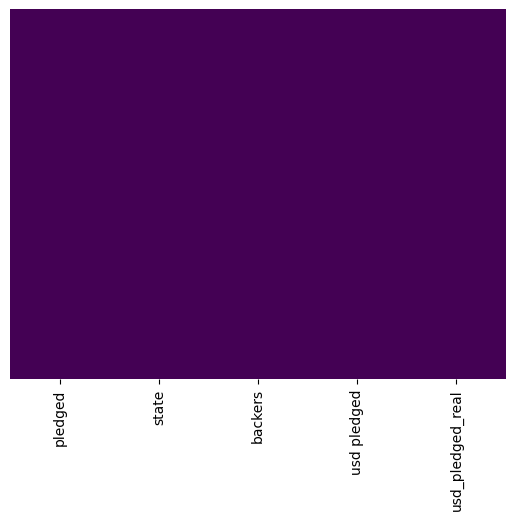

In [5]:
sns.heatmap(data_dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

X = data_dt.drop(['state'],axis=1)
y = data_dt['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


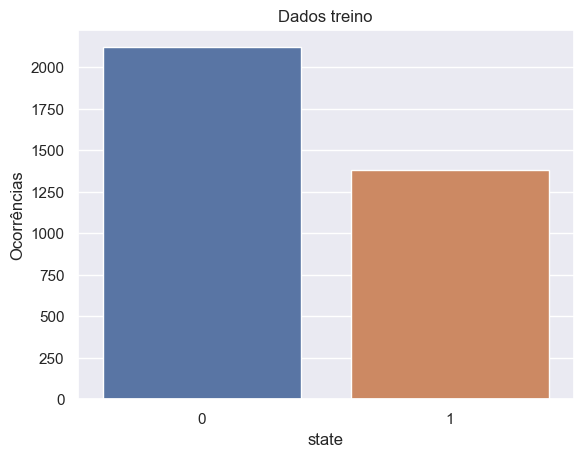

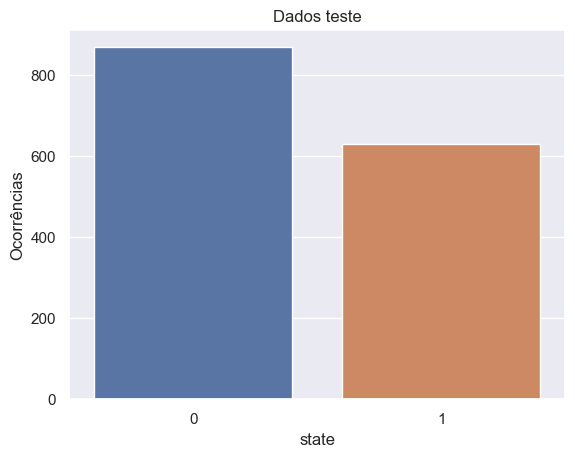

In [8]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=2022, solver='newton-cg')


/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(random_state=2022, solver='newton-cg')

In [11]:
predictions1 = logmodel1.predict(X_test)

In [12]:
logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs')
print(logmodel2)
logmodel2.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=2022)


LogisticRegression(random_state=2022)

In [13]:
predictions2 = logmodel2.predict(X_test)

In [14]:
logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(X_train,y_train.values.ravel())

LogisticRegression(random_state=2022, solver='liblinear')


LogisticRegression(random_state=2022, solver='liblinear')

In [15]:
predictions3 = logmodel3.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [17]:
print("With 'newton-cg': \n", classification_report(y_test,predictions1))
print("With 'lbfgs': \n", classification_report(y_test,predictions2))
print("With 'liblinear': \n", classification_report(y_test,predictions3))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       869
           1       0.85      0.60      0.70       631

    accuracy                           0.79      1500
   macro avg       0.81      0.76      0.77      1500
weighted avg       0.80      0.79      0.78      1500

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       869
           1       0.85      0.60      0.70       631

    accuracy                           0.79      1500
   macro avg       0.81      0.76      0.77      1500
weighted avg       0.80      0.79      0.78      1500

With 'liblinear': 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       869
           1       0.85      0.61      0.71       631

    accuracy                           0.79      1500
   macro avg       0.81      0.77      0.77      1500
weighted avg      

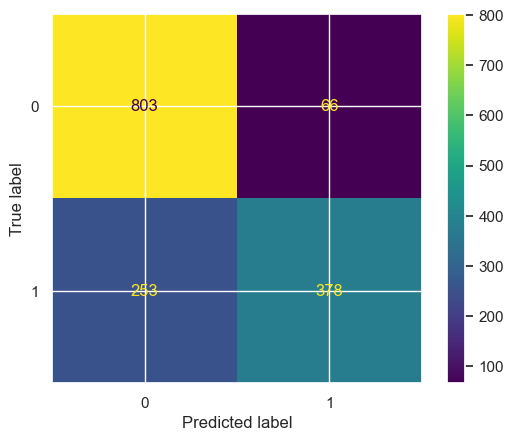

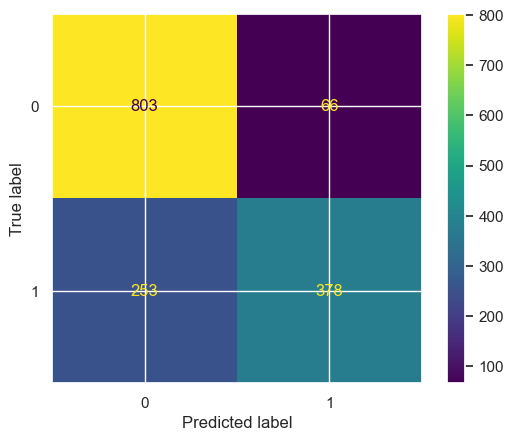

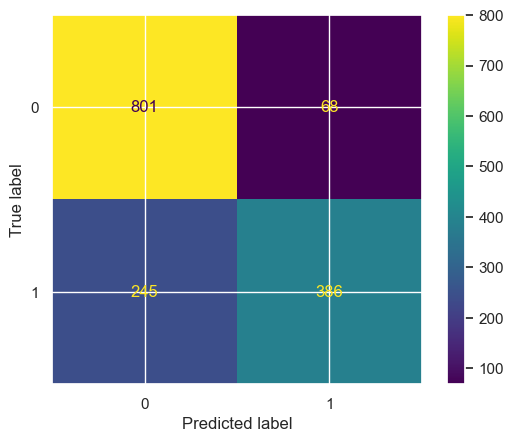

In [18]:
#Get the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,predictions1)
ConfusionMatrixDisplay.from_predictions(y_test,predictions2)
ConfusionMatrixDisplay.from_predictions(y_test,predictions3)
plt.show()

In [19]:
model_log = logmodel2
%store model_log

Stored 'model_log' (LogisticRegression)
